In [6]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
db_params = {
    "host": "localhost",  # or "127.0.0.1" if your database is on the local machine
    "port": 5432,         # Default PostgreSQL port
    "database": "Bike_stores",
    "user": "postgres",
    "password": "4823Em15@"
}
conn = psycopg2.connect(**db_params)

**Customer Segmentation (based on total spend & order frequency)**

***WHY?***

Customer segmentation helps businesses:

Identify high-value vs low-value customers.

Target loyal customers for upselling or retention.

Discover patterns in customer behavior.

Make data-driven marketing and product decisions.


**Here, we’ll segment customers using:**

Total Spend: How much a customer has spent in total.

Order Frequency: How often a customer places orders.

C:\Users\Admin\AppData\Local\Temp\ipykernel_24800\3787815825.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customers = pd.read_sql_query(query, conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_24800\3787815825.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_customers, x='segment', order=['High Value', 'Medium Value', 'Low Value'], palette='viridis')


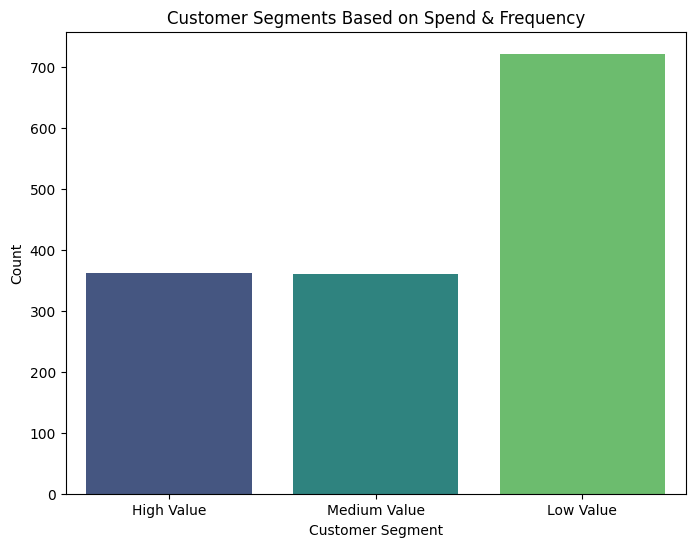

In [8]:
query = """
SELECT 
    c.customer_id,
    CONCAT(c.first_name, ' ', c.last_name) AS customer_name,
    COUNT(DISTINCT o.order_id) AS order_count,
    COALESCE(SUM(oi.quantity * oi.list_price * (1 - oi.discount)), 0) AS total_spent
FROM customers c
LEFT JOIN orders o ON c.customer_id = o.customer_id
LEFT JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY c.customer_id, c.first_name, c.last_name
"""
df_customers = pd.read_sql_query(query, conn)
df_customers.head()

#segmentation phase
# Define thresholds based on quartiles
spend_q = df_customers['total_spent'].quantile([0.25, 0.5, 0.75])
freq_q = df_customers['order_count'].quantile([0.25, 0.5, 0.75])

# Function to classify segment
def classify(row):
    if row['total_spent'] >= spend_q[0.75] and row['order_count'] >= freq_q[0.75]:
        return 'High Value'
    elif row['total_spent'] >= spend_q[0.5] and row['order_count'] >= freq_q[0.5]:
        return 'Medium Value'
    else:
        return 'Low Value'

df_customers['segment'] = df_customers.apply(classify, axis=1)
df_customers.head()

# Visualization of segments
plt.figure(figsize=(8, 6))
sns.countplot(data=df_customers, x='segment', order=['High Value', 'Medium Value', 'Low Value'], palette='viridis')
plt.title("Customer Segments Based on Spend & Frequency")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.show()


***🏪 Store Performance Dashboard***

***✅ Why is it important?***

Evaluate revenue, orders, and inventory by store.

Compare store effectiveness in different regions.

Inform investment or downsizing decisions.

Monitor best and worst-performing stores.

C:\Users\Admin\AppData\Local\Temp\ipykernel_24800\1979326783.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_store_perf = pd.read_sql_query(query, conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_24800\1979326783.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_store_perf, x='store_name', y='total_revenue', palette='coolwarm')


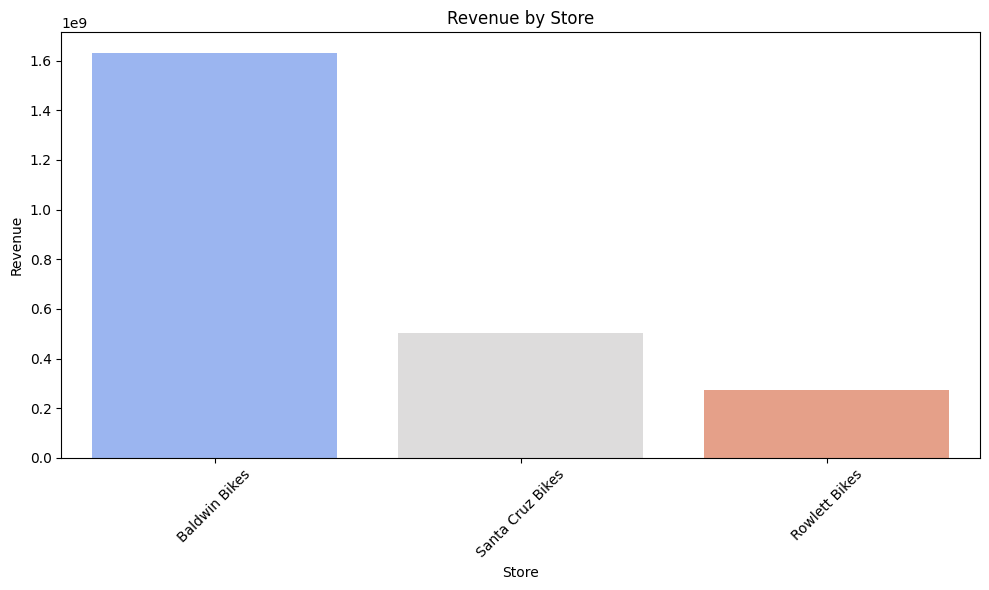

In [9]:
query = """
SELECT 
    s.store_id,
    s.store_name,
    COUNT(DISTINCT o.order_id) AS total_orders,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_revenue,
    SUM(st.quantity) AS total_inventory
FROM stores s
LEFT JOIN orders o ON s.store_id = o.store_id
LEFT JOIN order_items oi ON o.order_id = oi.order_id
LEFT JOIN stocks st ON s.store_id = st.store_id
GROUP BY s.store_id, s.store_name
ORDER BY total_revenue DESC
"""
df_store_perf = pd.read_sql_query(query, conn)
df_store_perf.head()

# Visualization of store performance
plt.figure(figsize=(10, 6))
sns.barplot(data=df_store_perf, x='store_name', y='total_revenue', palette='coolwarm')
plt.title('Revenue by Store')
plt.xticks(rotation=45)
plt.ylabel("Revenue")
plt.xlabel("Store")
plt.tight_layout()
plt.show()

***👥 Staff Efficiency Metrics***


***✅ Why is it important?***

Identify top-performing employees.

Track staff contribution to sales and customer satisfaction.

Use insights for training, promotion, or workforce planning.

Reward high performance and support lower performers.

C:\Users\Admin\AppData\Local\Temp\ipykernel_24800\991411377.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_staff_perf = pd.read_sql_query(query, conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_24800\991411377.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_staff_perf, x='staff_name', y='total_sales', palette='magma')


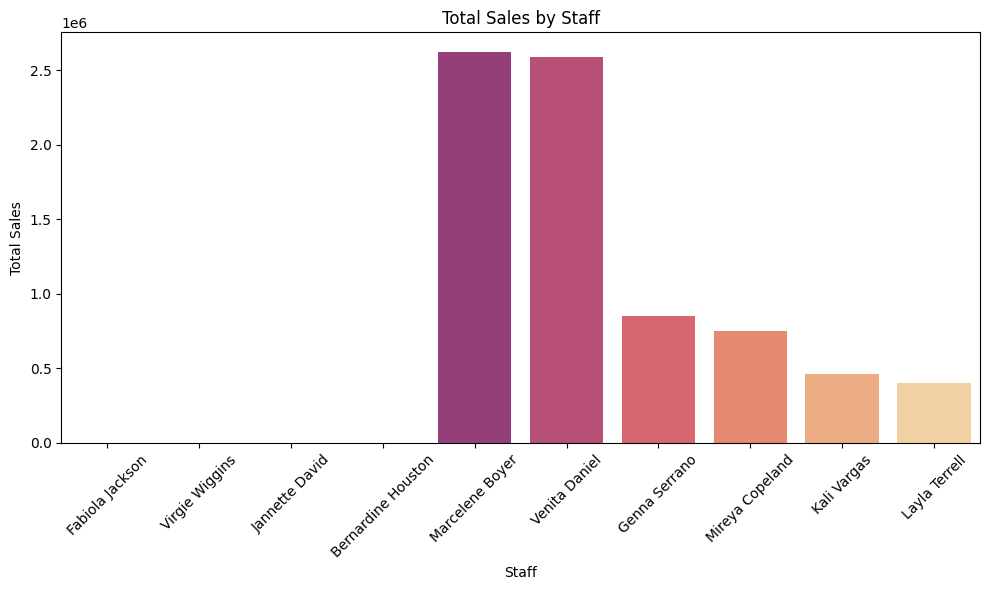

In [10]:
query = """
SELECT 
    s.staff_id,
    CONCAT(s.first_name, ' ', s.last_name) AS staff_name,
    COUNT(DISTINCT o.order_id) AS orders_handled,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS total_sales
FROM staffs s
LEFT JOIN orders o ON s.staff_id = o.staff_id
LEFT JOIN order_items oi ON o.order_id = oi.order_id
GROUP BY s.staff_id, s.first_name, s.last_name
ORDER BY total_sales DESC
"""
df_staff_perf = pd.read_sql_query(query, conn)
df_staff_perf.head()

# Visualization of staff performance

plt.figure(figsize=(10, 6))
sns.barplot(data=df_staff_perf, x='staff_name', y='total_sales', palette='magma')
plt.title('Total Sales by Staff')
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.xlabel("Staff")
plt.tight_layout()
plt.show()